In [2]:
import numpy as np

In [3]:
# 활성화 함수의 구현
# 간단한 버전
def step_function_simple(x):
    if x > 0:
        return 1
    else:
        return 0

In [4]:
# 계단함수
# 넘파이 배열도 받을 수 있도록
def step_function_numpy(x):
    y = x > 0
    return y.astype(np.int)  # int형으로 타입 변환

In [5]:
np_var = np.array([-1.0, 1.0, 3.0, -3.0, 1.0, 5.0, 6.0])
print(step_function_numpy(np_var))

[0 1 1 0 1 1 1]


## 계단함수

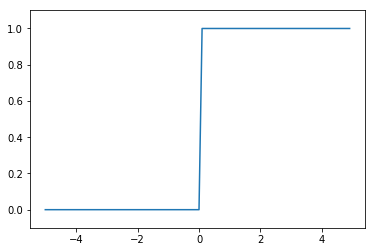

In [7]:
# 계단함수 그려보기
import numpy as np
import matplotlib.pylab as plt


def step_function_numpy_shorten(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function_numpy_shorten(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축의 범우 설정
plt.show()

## 시그모이드 함수

In [8]:
# 시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x1 = np.array([-5.0, -1.0, 2.0, 4.0])
y1 = sigmoid(x1)

print(y1)

[ 0.00669285  0.26894142  0.88079708  0.98201379]


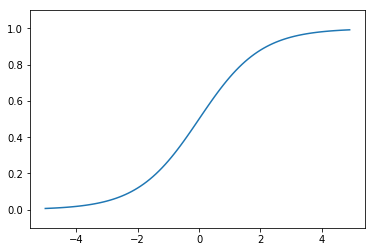

In [9]:
# 시그모이드 함수 그리기
x_range = np.arange(-5.0, 5.0, 0.1)
y2 = sigmoid(x_range)

plt.plot(x_range, y2)
plt.ylim(-0.1, 1.1)
plt.show()

## Relu함수

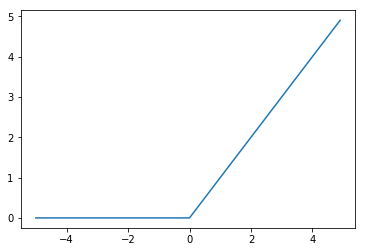

In [12]:
# Relu함수
def relu(x):
    return np.maximum(0, x)

x_range1 = np.arange(-5.0, 5.0, 0.1)
y3 = relu(x_range1)

plt.plot(x_range1, y3)
plt.show()

## 다차원 배열의 계산

In [13]:
# 1차원 배열
# 이 경우 shape에서 행의 값은 1차원 배열의 길이가 된다.
A = np.array([1, 2, 3, 4])
print(A)
print (np.ndim(A))
print (A.shape)
print (A.shape[0])
print ('--------')
A1 = np.array([[1], [2], [3], [4]])
print (A1)
print (np.ndim(A1))
print (A1.shape)
print (A1.shape[0])

[1 2 3 4]
1
(4,)
4
--------
[[1]
 [2]
 [3]
 [4]]
2
(4, 1)
4


#### 행렬의 내적(행렬 곱)

In [14]:
A2 = np.array([[1, 2], [3, 4]])
print(A2.shape)
B2 = np.array([[5, 6], [7, 8]])
print(B2.shape)
print(np.dot(A2, B2))    # 두개의 행렬을 곱하는 함수

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [15]:
# 1차원 배열은 벡터로 처리!
print(np.dot(A2, B2) + np.array([4, 5]))

[[23 27]
 [47 55]]


#### 신경망 연산

In [16]:
X = np.array([1, 2])
X.shape
W = np.array([[1, 3, 5], [2, 4, 6]])
print (W)
print (W.shape)
Y = np.dot(X, W)
print (Y)

[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3층 신경망 구현하기

In [17]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def identity_function(x):
    return x

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3

    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print (y)

[ 0.31682708  0.69627909]


## 출력층 설계하기

In [18]:
# 소프트맥스 함수 구현하기
def softmax(a):
    c = np.max(a)       # 오버플로우를 방지하기 위해 최대값을 각 항에서 빼준다.
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

print(softmax([12.0, 100.0, 3.0]))

[  6.05460190e-39   1.00000000e+00   7.47197234e-43]


In [19]:
import sys, os
sys.path.append(os.pardir)
from mnist import load_mnist

# 이미지를 1차원 배열로 가져옴
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## 신경망 추론처리

In [27]:
# coding: utf-8
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
# from common.functions import sigmoid, argmax
from mnist import load_mnist
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
    return x_test, t_test

def init_network1():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    
    y = softmax(a3)
    
    return y

x, t = get_data()
network = init_network1()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

/Users/byungwook/deep_learning_scratch/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.9207


##배치처리

In [ ]:
x, _ = get_data()
net = init_network1()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(net, x_batch)
    
    p = np.argmax(y_batch, axis=1)
    
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9207


/Users/byungwook/deep_learning_scratch/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
